In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
print(sns.__version__)

0.9.0


#Analisando as notas em geral

In [40]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [41]:
notas.shape

(100836, 4)

In [42]:
notas.columns = ["usuarioID", "filmeId", "nota", "momento"]
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [43]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
5         3.0
6         5.0
7         4.0
8         5.0
9         5.0
10        5.0
11        5.0
12        3.0
13        5.0
14        4.0
15        5.0
16        3.0
17        3.0
18        5.0
19        4.0
20        4.0
21        5.0
22        4.0
23        3.0
24        4.0
25        5.0
26        4.0
27        3.0
28        5.0
29        4.0
         ... 
100806    3.0
100807    4.0
100808    4.0
100809    3.5
100810    3.5
100811    5.0
100812    4.5
100813    4.0
100814    5.0
100815    3.5
100816    3.5
100817    3.0
100818    3.0
100819    3.0
100820    2.5
100821    4.5
100822    3.0
100823    3.0
100824    4.0
100825    4.0
100826    3.5
100827    3.5
100828    3.5
100829    5.0
100830    4.0
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [44]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [45]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [46]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [47]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

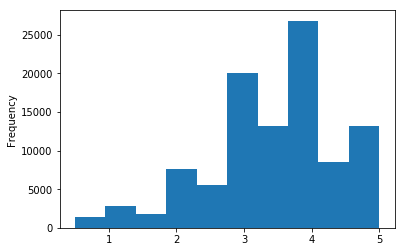

In [48]:
notas.nota.plot(kind='hist')
notas.nota.describe()

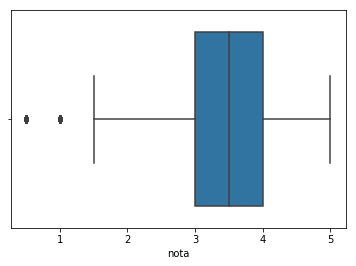

In [49]:
import seaborn as sns

sns.boxplot(notas.nota)

# Olhando os Filmes

In [50]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando algumas notas específicas

In [51]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [52]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [53]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

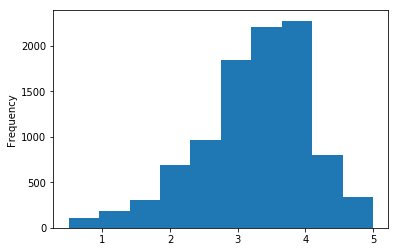

In [54]:
medias_por_filme.plot(kind='hist')

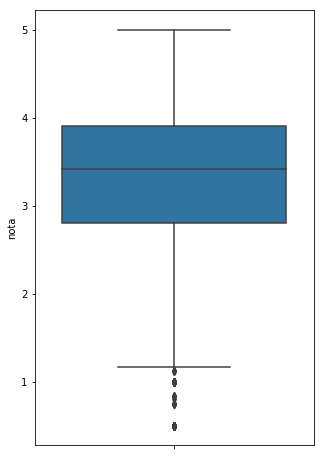

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [56]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

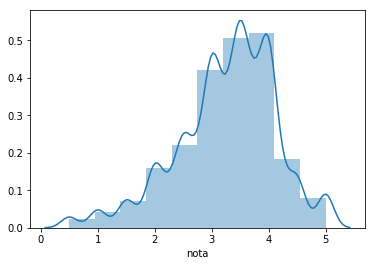

In [57]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das Médias dos Filmes')

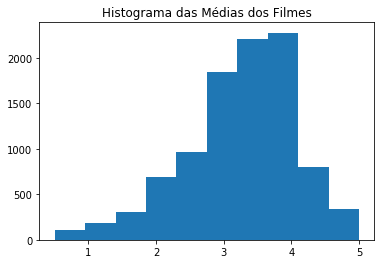

In [58]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das Médias dos Filmes")

In [59]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [60]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [61]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'cs', 'ar', 'id', 'ta', 'ro', 'te',
       'xx', 'pl', 'no', 'is', 'sl', 'nb', 'ps', 'tr', 'vi', 'af', 'hu', 'el',
       'ky'],
      dtype='object')

In [62]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [63]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


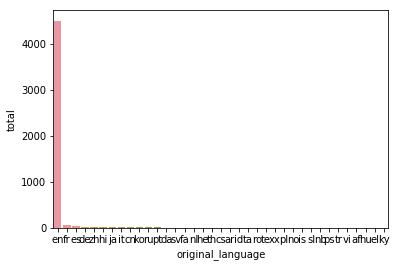

In [64]:
sns.barplot(x="original_language", y="total",data=contagem_de_lingua)

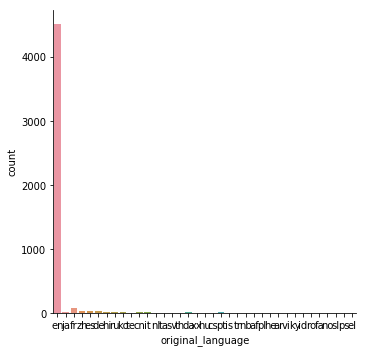

In [65]:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7f1a23c914a8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

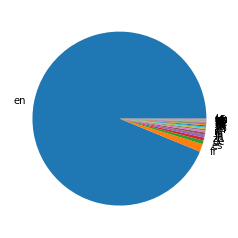

In [66]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [67]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print("en = ", total_de_ingles,"others = ", total_do_resto)

en =  4505 others =  298


In [68]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


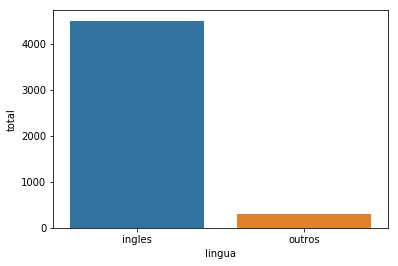

In [69]:
sns.barplot(x="lingua", y="total", data = dados)

([<matplotlib.patches.Wedge at 0x7f1a23b7ff98>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

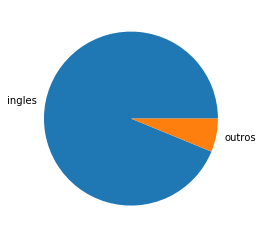

In [70]:
plt.pie(dados["total"], labels = dados["lingua"])

In [71]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ta     2
cs     2
ro     2
id     2
ar     2
pl     1
tr     1
ps     1
te     1
xx     1
vi     1
sl     1
ky     1
no     1
nb     1
af     1
el     1
is     1
hu     1
Name: original_language, dtype: int64

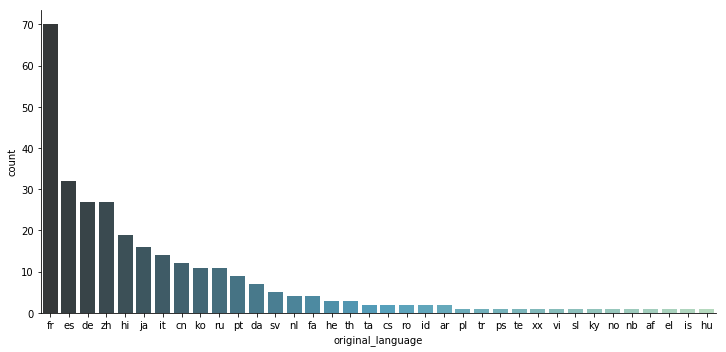

In [72]:
filmes_sem_lingua_original_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x="original_language", kind="count",
            data = filmes_sem_lingua_original_ingles,
            aspect = 2,
            palette="GnBu_d",
            order = total_por_lingua_de_outros_filmes.index
            )

# Revisando o papel da média, mediana, medidadas de tendência central, dispersão, desvio padrão, boxplot, histograma

In [74]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [77]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [84]:
print("nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("nota média do Toy Story %.2f" % notas_do_jumanji.nota.mean())

nota média do Toy Story 3.92
nota média do Toy Story 3.43


In [85]:
print("nota média do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("nota média do Toy Story %.2f" % notas_do_jumanji.nota.median())

nota média do Toy Story 4.00
nota média do Toy Story 3.50


In [0]:
import numpy as np

filme1 = np.append(np.array([2.5]*10),np.array([3.5]*10))
filme2 = np.append(np.array([5]*10),np.array([1]*10))

In [104]:
print(filme1.mean(),filme2.mean())
print(np.std(filme1),np.std(filme2))
print(np.median(filme1),np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

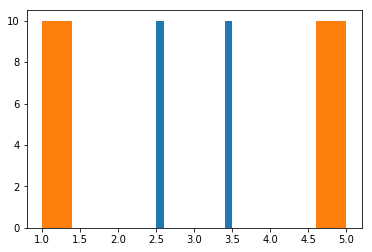

In [95]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f1a2166f7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a2166ff98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a2167d9b0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a2167d668>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1a2166f908>,
  <matplotlib.lines.Line2D at 0x7f1a216863c8>]}

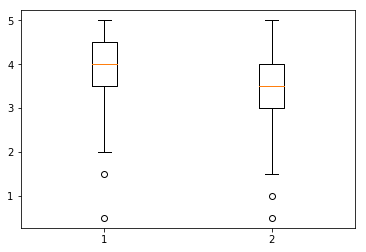

In [98]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])


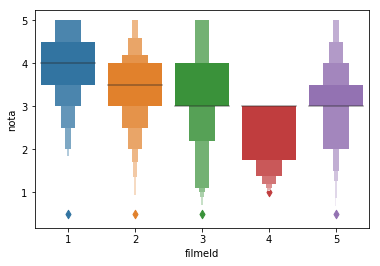

In [100]:
sns.boxenplot(x="filmeId", y="nota", data = notas.query("filmeId in [1,2,3,4,5]"))

In [103]:
print(notas_do_jumanji.nota.std())
print(notas_do_toy_story.nota.std())

0.8817134921476455
0.8348591407114045
